# Lab: Model Fitting and Evaluating

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Colour Palette
sns.set_palette("PRGn")

In [3]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [4]:
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

# Encoding for categorical features

In [6]:
categorical_df = df.select_dtypes(object)

In [7]:
categorical_df.drop('effective_to_date', axis=1, inplace=True)

In [8]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


In [9]:
categorical_df['vehicle_class'].unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [10]:
categorical_df.replace({'vehicle_class':{'luxury suv':'luxury car','sports car':'luxury car'}}, inplace=True)

In [11]:
categorical_df['vehicle_class'].value_counts()

four-door car    5424
two-door car     2185
suv              2103
luxury car        977
Name: vehicle_class, dtype: int64

In [12]:
encoded_df = pd.get_dummies(categorical_df, columns=['gender','response'], drop_first=True)

In [13]:
encoded_df['education'].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [14]:
encoded_df.replace({'education': {'high school or below':0, 'college':1, 'bachelor':2, 'master':3, 'doctor':4}}, inplace=True)

In [15]:
encoded_df['coverage'].unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [16]:
encoded_df.replace({'coverage':{'basic':0,'extended':1,'premium':2}}, inplace=True)

In [17]:
encoded_df['vehicle_size'].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [18]:
encoded_df.replace({'vehicle_size':{'small':1,'medsize':2,'large':3}}, inplace=True)

In [19]:
encoded_df = pd.get_dummies(encoded_df)

In [20]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   coverage                         10689 non-null  int64
 1   education                        10689 non-null  int64
 2   vehicle_size                     10689 non-null  int64
 3   gender_m                         10689 non-null  uint8
 4   response_yes                     10689 non-null  uint8
 5   region_central                   10689 non-null  uint8
 6   region_east                      10689 non-null  uint8
 7   region_north west                10689 non-null  uint8
 8   region_west region               10689 non-null  uint8
 9   month_feb                        10689 non-null  uint8
 10  month_jan                        10689 non-null  uint8
 11  employment_status_disabled       10689 non-null  uint8
 12  employment_status_employed       10689 non-nul

In [21]:
encoded_df.head()

,coverage,education,vehicle_size,gender_m,response_yes,region_central,region_east,region_north west,region_west region,month_feb,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,2,1,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,0,1,2,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,0,2,2,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,1,1,2,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2,2,2,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


# Looking into nummerical variables

In [22]:
numerical_df = df.select_dtypes(np.number)

<Axes: >

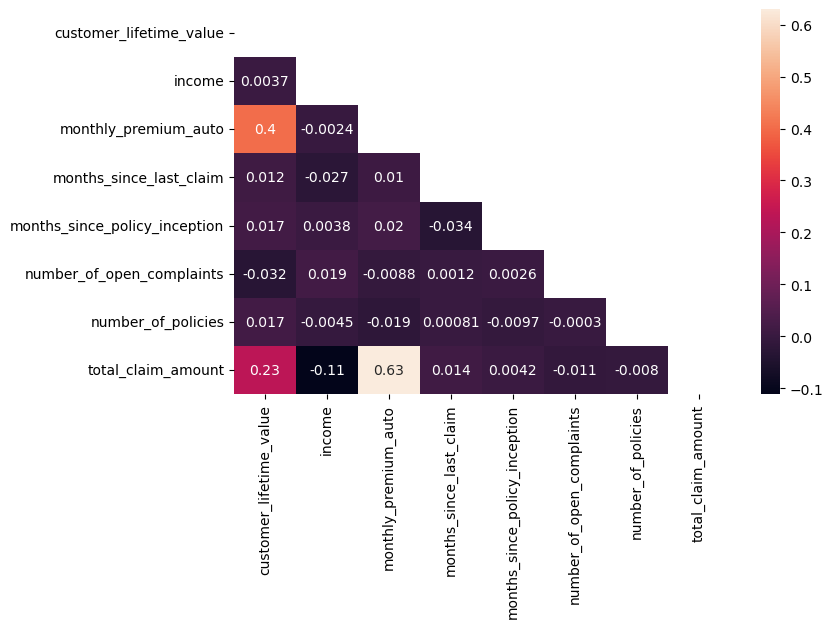

In [23]:
corr = numerical_df.corr()
matrix = np.triu(corr)
mask = matrix

fig = plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, mask=matrix)
# mask recommend to hide upper triangle (doubled)

➡️ No value with high correlation

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

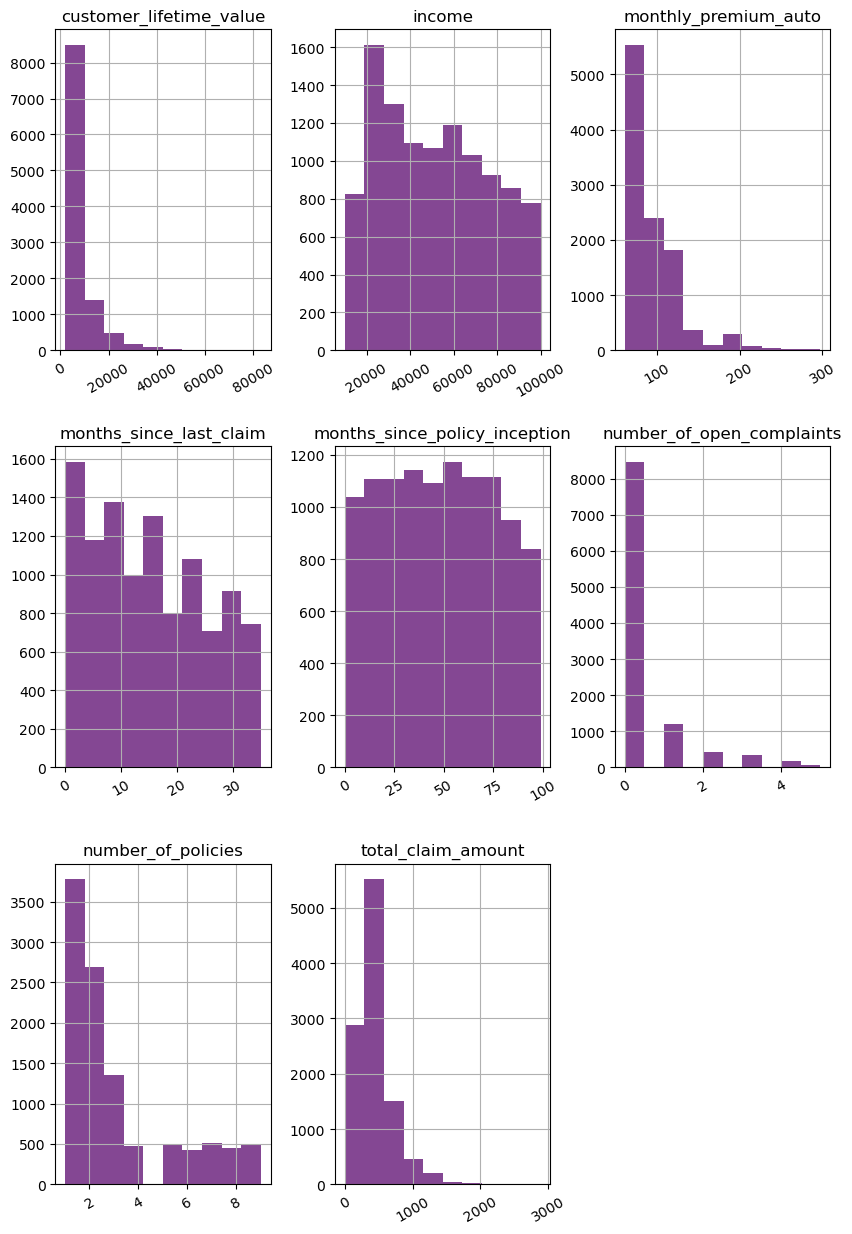

In [24]:
numerical_df.hist(figsize=(10,15), xrot=30)


## X-y-Split

In [25]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [26]:
X_df = numerical_df.drop('total_claim_amount', axis=1)

X = X_df
y = numerical_df['total_claim_amount']

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardize the data (after the data split!).

In [28]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)


## Apply Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train_scaled, y_train)

## Model Interpretation

In [30]:
X_test_scaled = scaler.transform(X_test)

In [31]:
y_pred = model.predict(X_test_scaled)

In [32]:
residuals = np.array(y_test - y_pred)

In [33]:
res_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'residual':residuals})

In [34]:
res_df

,y_test,y_pred,residual
3487,120,230.080624,-110.080624
668,660,559.062818,100.937182
10315,244,340.972244,-96.972244
5332,86,268.949617,-182.949617
1523,1032,1104.937431,-72.937431
...,...,...,...
7089,285,493.750706,-208.750706
2507,494,462.964323,31.035677
7965,537,490.612535,46.387465
8523,446,463.725456,-17.725456


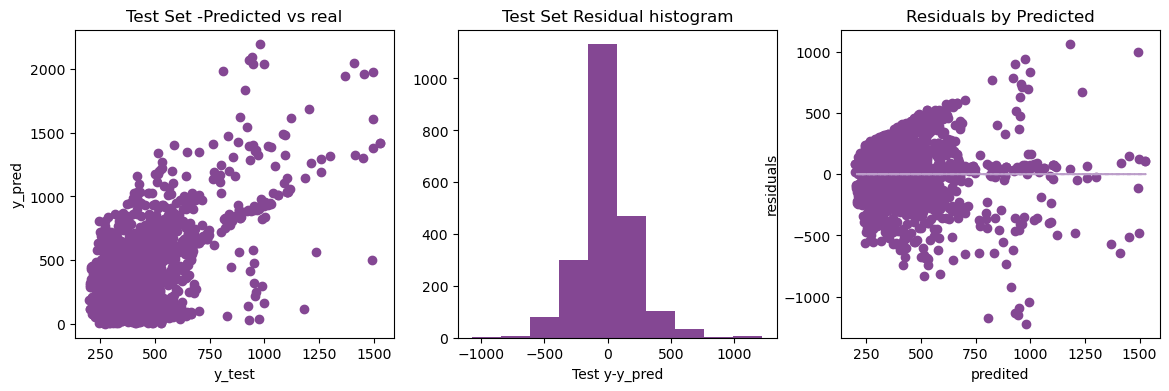

In [35]:
# Make a scatterplot of y_pred vs y
# Question: What kind of plot will you get if all the all the predictions are perfect?
# Answer: A straight line!

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<Axes: ylabel='total_claim_amount'>

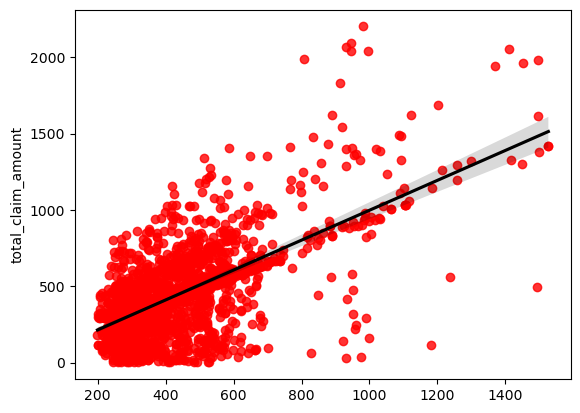

In [36]:
yp_ = y_pred
yt_ = y_test
sns.regplot(x=yp_,y=yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

## Error Metrics

In [37]:
from sklearn.metrics import mean_squared_error as mse

In [38]:
mse(y_test,y_pred)

48603.25525355552

In [39]:
np.sqrt(mse(y_test,y_pred))

220.4614597918546

In [40]:
numerical_df['total_claim_amount'].mean()

434.22724296005237

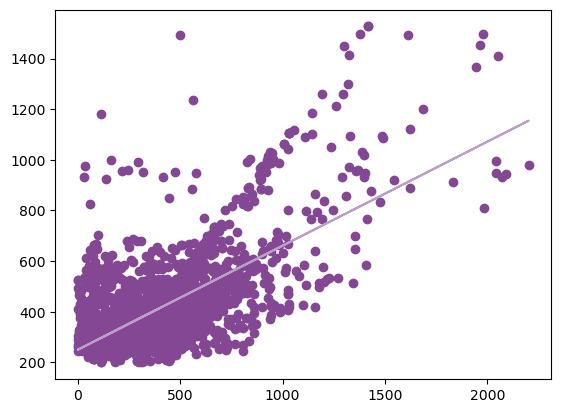

In [41]:
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

In [43]:
print(mae(y_test,y_pred))

150.17517808486429


In [44]:
R2=r2_score(y_test,y_pred)
R2

0.40127309153524027

In [45]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3993054444182199

## Feature Importances

In [46]:
feature_importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Variable,Importance
2,monthly_premium_auto,188.742534
1,income,33.567786
0,customer_lifetime_value,7.443740
4,months_since_policy_inception,3.003318
6,number_of_policies,2.407075
5,number_of_open_complaints,0.286639
3,months_since_last_claim,0.127913


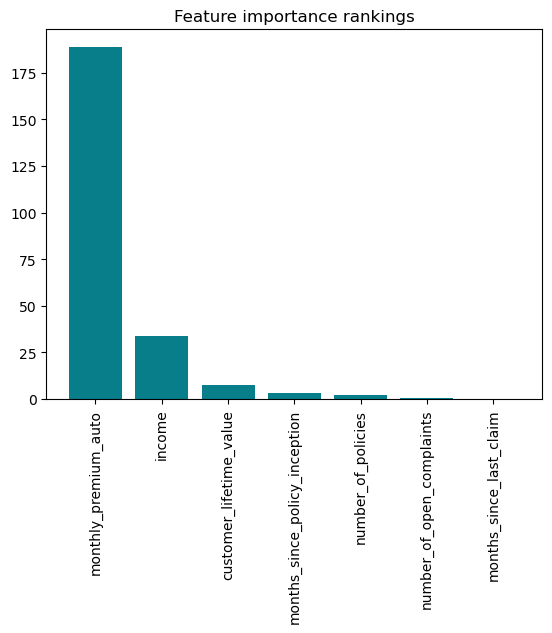

In [47]:
plt.bar(x=feature_importances['Variable'].iloc[:10], height=feature_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation=90)
plt.show()

## Include categorical Columns

In [48]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [49]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   coverage                         10689 non-null  int64
 1   education                        10689 non-null  int64
 2   vehicle_size                     10689 non-null  int64
 3   gender_m                         10689 non-null  uint8
 4   response_yes                     10689 non-null  uint8
 5   region_central                   10689 non-null  uint8
 6   region_east                      10689 non-null  uint8
 7   region_north west                10689 non-null  uint8
 8   region_west region               10689 non-null  uint8
 9   month_feb                        10689 non-null  uint8
 10  month_jan                        10689 non-null  uint8
 11  employment_status_disabled       10689 non-null  uint8
 12  employment_status_employed       10689 non-nul

In [50]:
num_cat_df = pd.concat([numerical_df, encoded_df], axis=1)

In [51]:
num_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   customer_lifetime_value          10689 non-null  int64
 1   income                           10689 non-null  int64
 2   monthly_premium_auto             10689 non-null  int64
 3   months_since_last_claim          10689 non-null  int64
 4   months_since_policy_inception    10689 non-null  int64
 5   number_of_open_complaints        10689 non-null  int64
 6   number_of_policies               10689 non-null  int64
 7   total_claim_amount               10689 non-null  int64
 8   coverage                         10689 non-null  int64
 9   education                        10689 non-null  int64
 10  vehicle_size                     10689 non-null  int64
 11  gender_m                         10689 non-null  uint8
 12  response_yes                     10689 non-nul

In [52]:
X = num_cat_df.drop('total_claim_amount', axis=1)
y = num_cat_df['total_claim_amount']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,vehicle_size,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_suv,vehicle_class_two-door car
9877,21423,22379,65,9,31,0,2,0,2,2,...,0,0,1,0,0,0,0,0,0,1
10069,8391,40211,106,5,98,2,6,2,0,1,...,0,0,0,0,1,0,0,0,0,1
10317,3969,49544,101,3,29,0,1,0,1,2,...,0,0,1,0,0,0,0,0,1,0
9796,14914,45963,63,3,73,2,2,0,2,2,...,0,0,1,0,0,0,1,0,0,0
8995,18060,57882,115,1,61,0,2,0,2,2,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7610,98701,94,22,66,0,3,1,1,1,...,0,0,0,1,0,0,1,0,0,0
5191,35186,86134,98,17,78,0,2,1,2,1,...,0,0,1,0,0,0,0,0,0,1
5390,4241,19834,64,26,8,4,8,0,3,1,...,0,0,1,0,0,0,1,0,0,0
860,12941,77060,106,23,90,0,2,0,0,2,...,0,0,0,1,0,0,0,0,1,0


In [55]:
X_train_num = X_train[X_df.columns]
X_train_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
9877,21423,22379,65,9,31,0,2
10069,8391,40211,106,5,98,2,6
10317,3969,49544,101,3,29,0,1
9796,14914,45963,63,3,73,2,2
8995,18060,57882,115,1,61,0,2
...,...,...,...,...,...,...,...
5734,7610,98701,94,22,66,0,3
5191,35186,86134,98,17,78,0,2
5390,4241,19834,64,26,8,4,8
860,12941,77060,106,23,90,0,2


In [56]:
scaler = StandardScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)

In [57]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled)
X_train_num_scaled_df.columns = X_train_num.columns

In [58]:
X_train_num_scaled_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.960751,-1.191074,-0.818409,-0.605527,-0.617389,-0.417266,-0.410084
1,0.057838,-0.469596,0.367470,-1.000293,1.788540,1.805812,1.257753
2,-0.587856,-0.091986,0.222850,-1.197677,-0.689207,-0.417266,-0.827043
3,1.010316,-0.236872,-0.876257,-1.197677,0.890806,1.805812,-0.410084
4,1.469691,0.245368,0.627784,-1.395060,0.459893,-0.417266,-0.410084
...,...,...,...,...,...,...,...
8546,-0.056203,1.896893,0.020383,0.677465,0.639440,-0.417266,0.006875
8547,3.970404,1.388436,0.136079,0.184007,1.070352,-0.417266,-0.410084
8548,-0.548139,-1.294044,-0.847333,1.072232,-1.443304,4.028889,2.091671
8549,0.722222,1.021304,0.367470,0.776157,1.501265,-0.417266,-0.410084


In [59]:
X_train_cat = X_train[encoded_df.columns]

In [60]:
X_train_cat = X_train_cat.reset_index()

In [61]:
X_train = pd.concat([X_train_num_scaled_df, X_train_cat],axis=1)

In [64]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train, y_train)

In [65]:
X_test_num = X_test[X_df.columns]

X_test_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3487,4871,72648,61,0,78,0,5
668,9233,42600,115,10,78,0,3
10315,3203,68370,80,0,45,0,1
5332,5067,61067,64,20,0,1,3
1523,8427,46503,215,4,21,1,1
...,...,...,...,...,...,...,...
7089,3621,13457,94,31,28,0,1
2507,8283,71034,103,26,15,0,3
7965,4035,83983,112,6,73,0,1
8523,7240,32818,93,17,39,0,8


In [69]:
X_test_num_scaled = scaler.transform(X_test_num)

In [70]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled)
X_test_num_scaled_df.columns = X_test_num.columns

In [71]:
X_test_cat = X_test[encoded_df.columns]

In [72]:
X_test_cat = X_test_cat.reset_index()

In [73]:
X_test = pd.concat([X_test_num_scaled_df, X_test_cat],axis=1)

In [74]:
y_pred = model.predict(X_test)

In [75]:
residuals = np.array(y_test - y_pred)

In [76]:
res_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'residual':residuals})

In [77]:
res_df

,y_test,y_pred,residual
3487,120,-68.826694,188.826694
668,660,602.005006,57.994994
10315,244,257.029175,-13.029175
5332,86,-32.617246,118.617246
1523,1032,1081.345940,-49.345940
...,...,...,...
7089,285,360.627019,-75.627019
2507,494,541.875144,-47.875144
7965,537,672.125768,-135.125768
8523,446,523.495483,-77.495483


In [78]:
mse(y_test,y_pred)

18425.00082715968

In [79]:
np.sqrt(mse(y_test,y_pred))

135.7387226518641

In [80]:
print(mae(y_test,y_pred))

93.59618200363931


In [81]:
R2=r2_score(y_test,y_pred)
R2

0.7730287050495666

In [83]:
R2_test=model.score(X_test,y_test)
R2_train=model.score(X_train,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7671446676384656